# Criando um projeto de uma loja ficticia de roupas

## O objetivo desse projeto é fazer análises simples dos dados e mostrar em gráficos. 

### Iremos usar as bibliotecas pandas, numpy, matplotlib, seaborn e a função Axes3D

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
nomes_produtos = ['Camisa Manga Longa', 'Camisa Gola Polo', 'Camiseta Basica', 'Calça Jeans', 'Sapato Social']

In [3]:
nomes_produtos

['Camisa Manga Longa',
 'Camisa Gola Polo',
 'Camiseta Basica',
 'Calça Jeans',
 'Sapato Social']

In [4]:
# Criando um Dataframe

In [5]:
df_loja = pd.DataFrame({'ID Produto': np.random.randint(1, 11, 1000),
                           'Nome Produto': np.random.choice(nomes_produtos, 1000),
                           'Quantidade Vendida': np.random.randint(1, 21, 1000),
                           'Preco Unitario': np.round(np.random.uniform(10, 100, 1000), 2),
                           'Data da Venda': np.random.choice(pd.date_range(start = '2021-01-01', end = '2021-12-31'), 1000)
                       })

In [6]:
df_loja

,ID Produto,Nome Produto,Quantidade Vendida,Preco Unitario,Data da Venda
0,8,Calça Jeans,3,19.35,2021-06-01
1,2,Camiseta Basica,1,11.36,2021-08-03
2,1,Camisa Manga Longa,6,56.37,2021-09-18
3,5,Sapato Social,4,17.08,2021-09-19
4,8,Calça Jeans,18,72.75,2021-10-30
...,...,...,...,...,...
995,5,Camiseta Basica,3,18.90,2021-05-23
996,10,Camisa Manga Longa,10,75.81,2021-01-05
997,8,Camiseta Basica,3,64.20,2021-10-02
998,5,Camisa Gola Polo,15,48.50,2021-05-05


In [7]:
# Criando uma coluna para mes
df_loja['Mês'] = pd.DatetimeIndex(df_loja['Data da Venda']).month

In [8]:
df_loja

,ID Produto,Nome Produto,Quantidade Vendida,Preco Unitario,Data da Venda,Mês
0,8,Calça Jeans,3,19.35,2021-06-01,6
1,2,Camiseta Basica,1,11.36,2021-08-03,8
2,1,Camisa Manga Longa,6,56.37,2021-09-18,9
3,5,Sapato Social,4,17.08,2021-09-19,9
4,8,Calça Jeans,18,72.75,2021-10-30,10
...,...,...,...,...,...,...
995,5,Camiseta Basica,3,18.90,2021-05-23,5
996,10,Camisa Manga Longa,10,75.81,2021-01-05,1
997,8,Camiseta Basica,3,64.20,2021-10-02,10
998,5,Camisa Gola Polo,15,48.50,2021-05-05,5


In [9]:
df_loja.dtypes

ID Produto                     int32
Nome Produto                  object
Quantidade Vendida             int32
Preco Unitario               float64
Data da Venda         datetime64[ns]
Mês                            int32
dtype: object

In [10]:
# Agrupando dados
df_loja_vendas_por_mes = df_loja.groupby(['Nome Produto'])['Quantidade Vendida'].sum()

In [11]:
df_agrupado = df_loja_vendas_por_mes

# Plotando um gráfico de linha da quantidade Vendida no ano por produto.

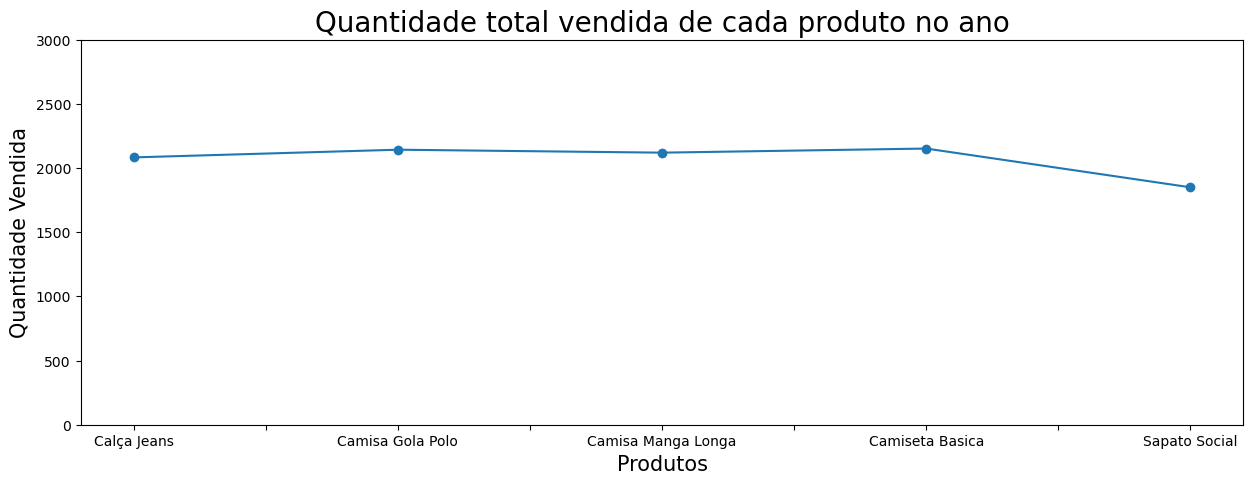

In [25]:
df_agrupado.plot(kind='line', marker='o', figsize=(15, 5))
plt.xlabel('Produtos', fontsize = 15)
plt.ylabel('Quantidade Vendida', fontsize = 15)
plt.title('Quantidade total vendida de cada produto no ano', fontsize = 20)

# Definindo o limite inferior do eixo y como 0
plt.ylim(bottom=0)

# Define os limites do eixo y (0 até 50)
plt.ylim(0, 3000)

plt.show()

# Plotando um grafico de pizza da quantidade vendida por produto

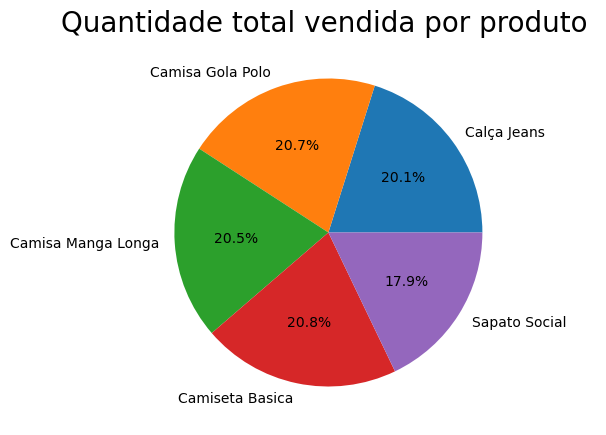

In [13]:
df_agrupado.plot(figsize = (15,5), kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('')  # Define o rótulo do eixo y como uma string vazia para ocultá-lo
plt.title('Quantidade total vendida por produto ', fontsize = 20)
plt.show()

# Grafico de dispersão

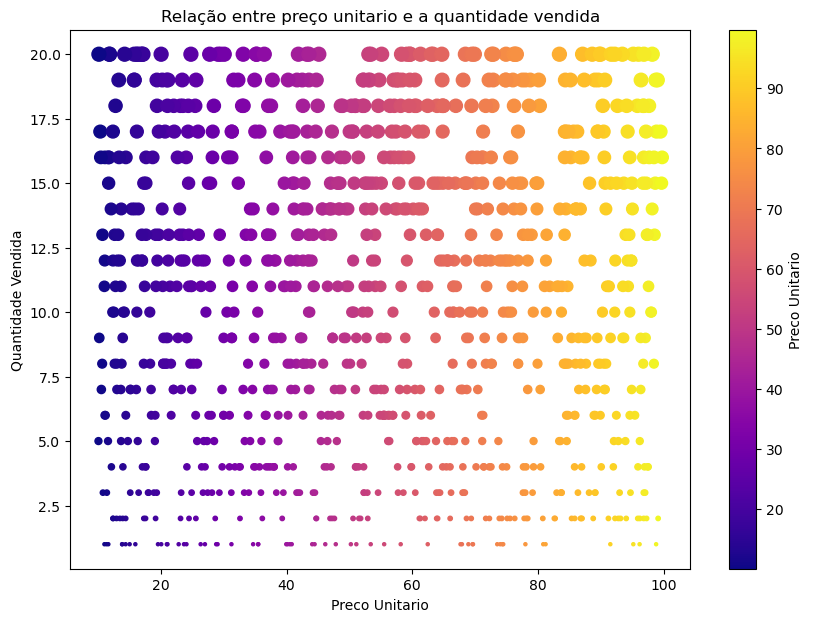

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(df_loja['Preco Unitario'], df_loja['Quantidade Vendida'], s = df_loja['Quantidade Vendida'] * 5, 
            c = df_loja['Preco Unitario'], cmap = 'plasma')
plt.xlabel('Preco Unitario')
plt.ylabel('Quantidade Vendida')
plt.title('Relação entre preço unitario e a quantidade vendida')
plt.colorbar(label = 'Preco Unitario')
plt.show()

In [15]:
df_agrupamento_empilhado = df_loja.groupby('Nome Produto')['Quantidade Vendida'].mean()

In [16]:
df_agrupamento_empilhado

Nome Produto
Calça Jeans           10.261084
Camisa Gola Polo      10.933673
Camisa Manga Longa    10.443350
Camiseta Basica       10.247619
Sapato Social          9.840426
Name: Quantidade Vendida, dtype: float64

In [17]:
# Dataframe dos produtos
df_loja_vendas_manga_longa = df_loja_vendas_por_mes.loc['Camisa Manga Longa']
df_loja_vendas_gola_polo = df_loja_vendas_por_mes.loc['Camisa Gola Polo']
df_loja_vendas_calca_jeans = df_loja_vendas_por_mes.loc['Calça Jeans']
df_loja_vendas_camiseta_basica = df_loja_vendas_por_mes.loc['Camiseta Basica']
df_loja_vendas_sapato_social = df_loja_vendas_por_mes.loc['Sapato Social']

In [18]:
df_loja_vendas_manga_longa

2120

# Grafico de barras empilhado dos produtos vendidos por mês

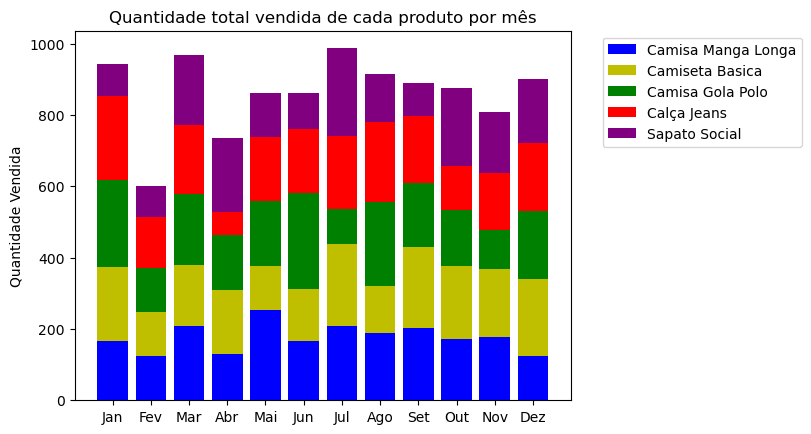

In [26]:
# Filtrando os dados para cada produto
df_loja_vendas_manga_longa = df_loja[df_loja['Nome Produto'] == 'Camisa Manga Longa'].groupby('Mês')['Quantidade Vendida'].sum()
df_loja_vendas_camiseta_basica = df_loja[df_loja['Nome Produto'] == 'Camiseta Basica'].groupby('Mês')['Quantidade Vendida'].sum()
df_loja_vendas_gola_polo = df_loja[df_loja['Nome Produto'] == 'Camisa Gola Polo'].groupby('Mês')['Quantidade Vendida'].sum()
df_loja_vendas_calca_jeans = df_loja[df_loja['Nome Produto'] == 'Calça Jeans'].groupby('Mês')['Quantidade Vendida'].sum()
df_loja_vendas_sapato_social = df_loja[df_loja['Nome Produto'] == 'Sapato Social'].groupby('Mês')['Quantidade Vendida'].sum()

labels = range(1, 13)  # Meses

fig, ax = plt.subplots()

# Barra para Camisa Manga Longa
ax.bar(labels, df_loja_vendas_manga_longa, label='Camisa Manga Longa', color='b')

# Barra para Camiseta Basica
ax.bar(labels, df_loja_vendas_camiseta_basica, label='Camiseta Basica',
       bottom=df_loja_vendas_manga_longa, color='y')

# Barra para Camisa Gola Polo
ax.bar(labels, df_loja_vendas_gola_polo, label='Camisa Gola Polo',
       bottom=df_loja_vendas_manga_longa + df_loja_vendas_camiseta_basica, color='g')

# Barra para Calça Jeans
ax.bar(labels, df_loja_vendas_calca_jeans, label='Calça Jeans',
       bottom=df_loja_vendas_manga_longa + df_loja_vendas_camiseta_basica + df_loja_vendas_gola_polo, color='r')

# Barra para Sapato Social
ax.bar(labels, df_loja_vendas_sapato_social, label='Sapato Social',
       bottom=df_loja_vendas_manga_longa + df_loja_vendas_camiseta_basica + df_loja_vendas_gola_polo + df_loja_vendas_calca_jeans, color='purple')

# Adicionando rótulos e título
ax.set_ylabel('Quantidade Vendida')
ax.set_title('Quantidade total vendida de cada produto por mês')
ax.set_xticks(labels)
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Movendo a legenda para fora do gráfico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## Gráfico 3D da Relação entre o Preço Unitário x Quantidade Vendida x ID Produto

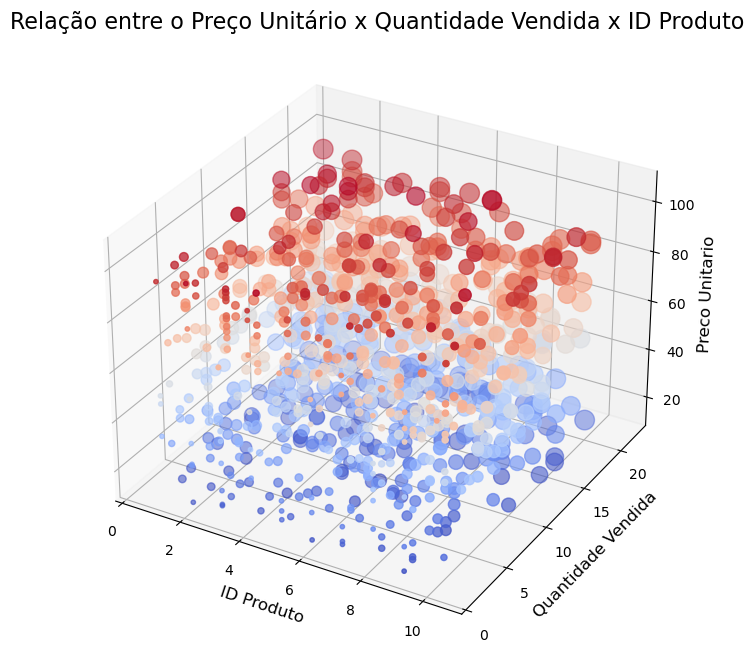

In [23]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = '3d')

x = df_loja['ID Produto']
y = df_loja['Quantidade Vendida']
z = df_loja['Preco Unitario']

ax.scatter(x,y,z, c = z, cmap = 'coolwarm', s = y * 10)

ax.set_xlabel('ID Produto', fontsize = 12)
ax.set_ylabel('Quantidade Vendida', fontsize = 12)
ax.set_zlabel('Preco Unitario', fontsize = 12)

ax.tick_params(axis='both', labelsize = 10)

ax.set_xlim(0,11)
ax.set_ylim(0,23)
ax.set_zlim(10,110)

plt.title('Relação entre o Preço Unitário x Quantidade Vendida x ID Produto', fontsize = 16)


plt.show()